2. Обзор типов визуализации

ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

ГИСТОГРАММА (HISTOGRAM)

Text(0, 0.5, 'Тип объекта')

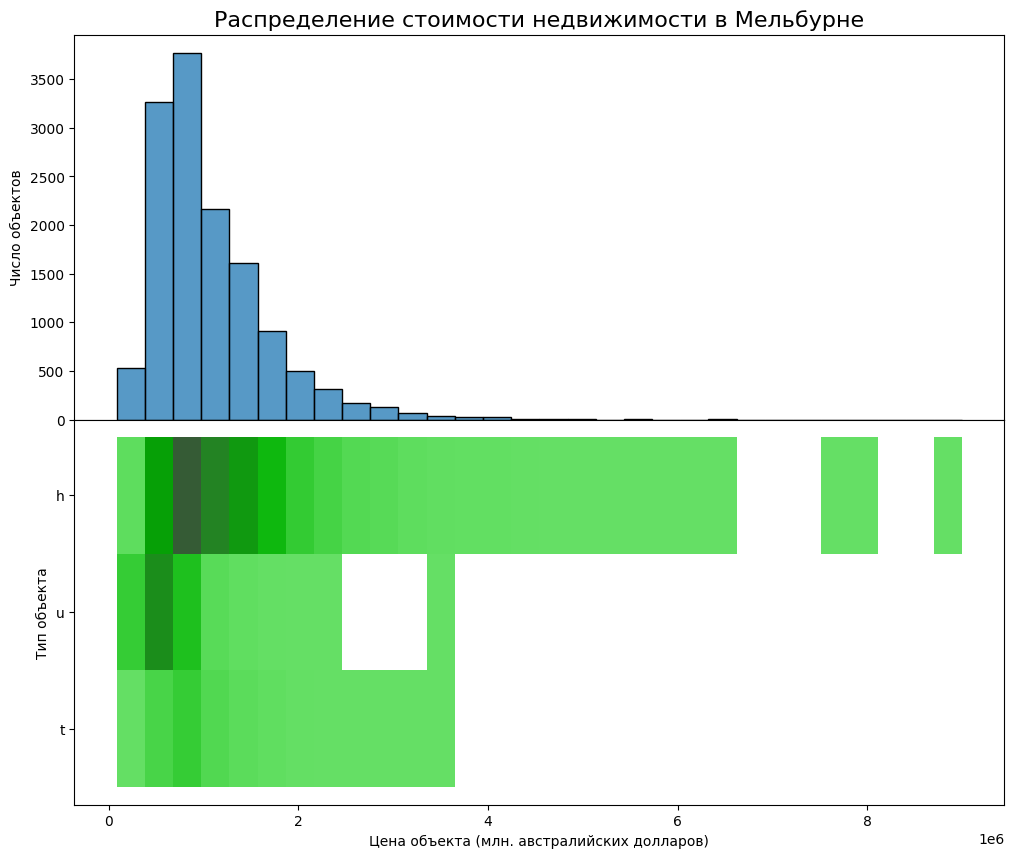

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)

Text(0, 0.5, 'Длина крыльев')

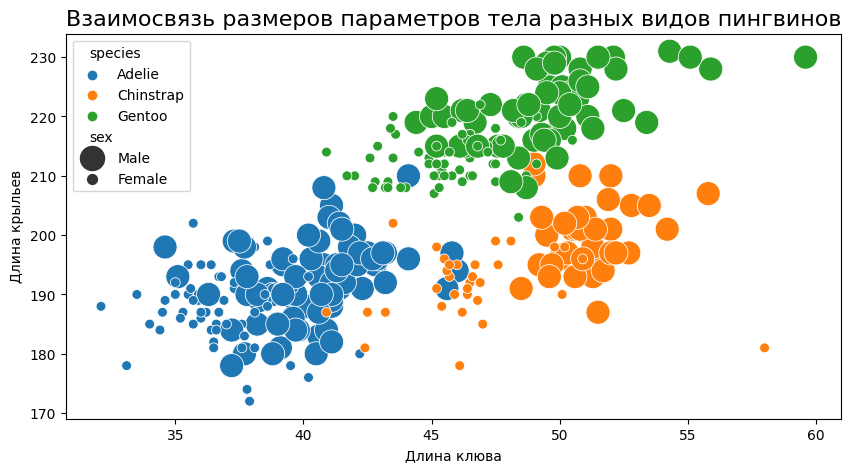

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

КРУГОВАЯ ДИАГРАММА (PIE CHART)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

ТЕПЛОВАЯ КАРТА (HEATMAP)

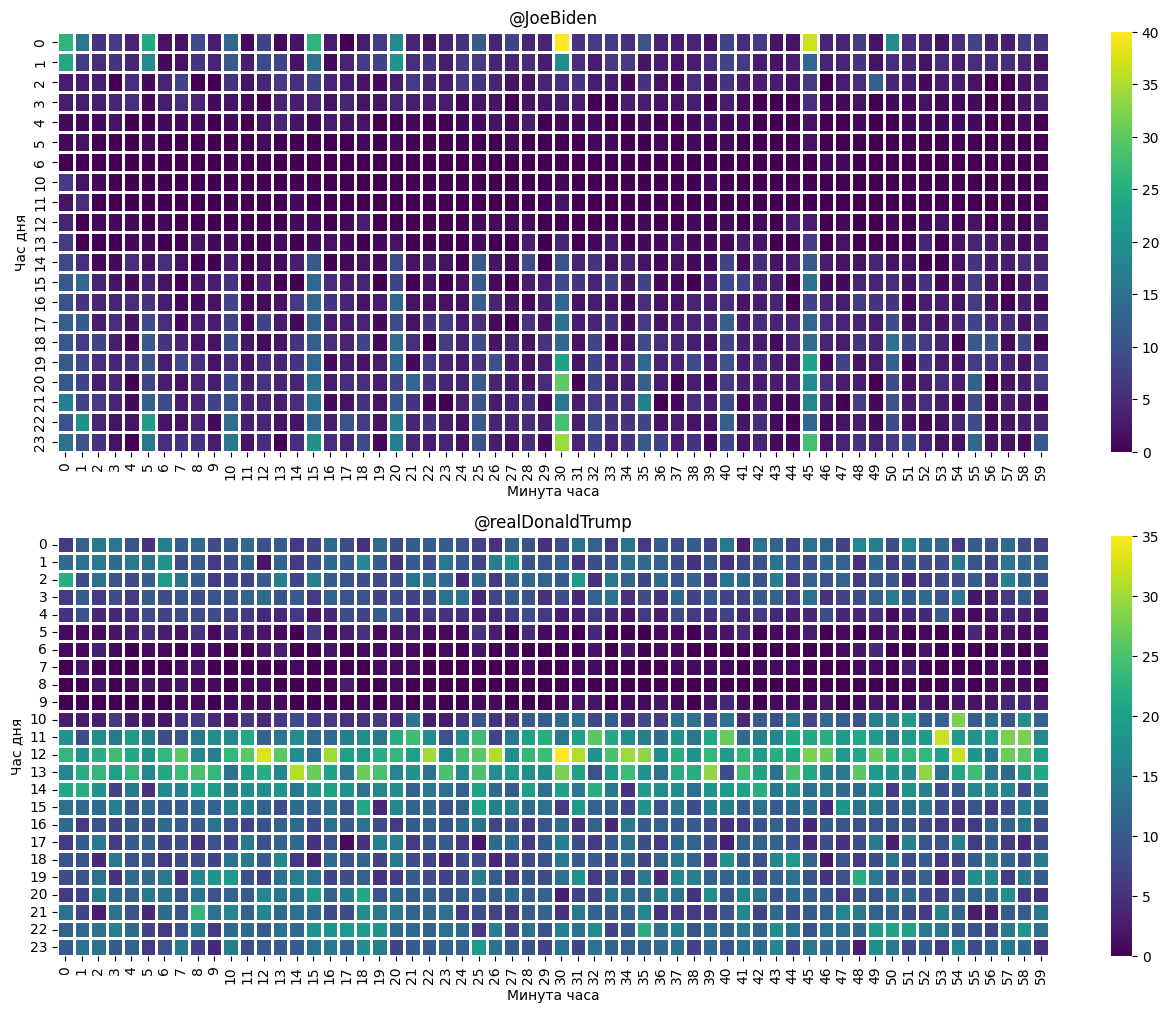

In [9]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

КОРОБЧАТАЯ ДИАГРАММА (BOXPLOT, BOX AND WHISKER PLOT)

Text(0, 0.5, 'Тип пользователя')

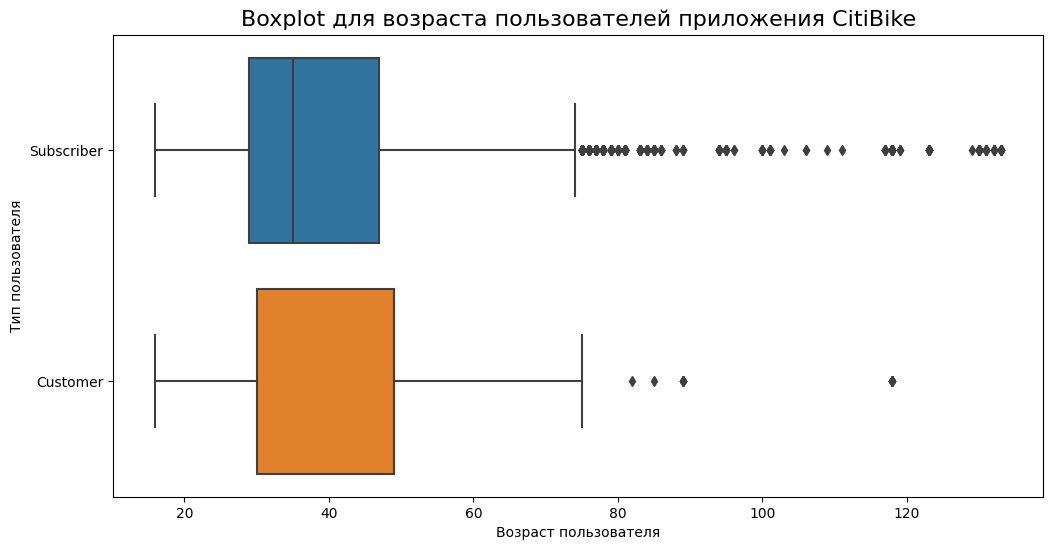

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')

3. Знакомимся с новыми данными: коронавирус

In [ ]:
covid_data = pd.read_csv('data/covid_data.csv')
#display(covid_data.head())

vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
#display(vaccinations_data.head())

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()#Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам
#display(covid_data.head())

covid_data['date'] = pd.to_datetime(covid_data['date'])#Преобразуем даты в формат datetime с помощью функции pd.to_datetime()
#display(covid_data.head())

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered'] #Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов
#display(covid_data.head())

covid_data = covid_data.sort_values(by=['country', 'date']) #Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff()
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
#display(covid_data.head())

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
#display(vaccinations_data.head())

#display(covid_data['date'].min())#Задание 3.1
#display(covid_data['date'].max())
#print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

#display(vaccinations_data['date'].min())#Задание 3.2
#display(vaccinations_data['date'].max())
#print(f"Данные о заболеваемости предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left') #Задание 3.3
#display(covid_df.shape)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] *100
#display(covid_df.head())


display (     round ((covid_df    [covid_df['country']=='United States']   ['death_rate'] . max()),2   )  ) #Задание 3.4

display (     round ((covid_df    [covid_df['country']=='Russia']   ['recover_rate'] . mean()),2   )  ) #Задание 3.5


4. Графические возможности библиотеки Pandas

date
2020-01-22         0.0
2020-01-23       537.0
2020-01-24      -158.0
2020-01-25       495.0
2020-01-26       680.0
                ...   
2021-05-25    531845.0
2021-05-26    568216.0
2021-05-27    554368.0
2021-05-28    499934.0
2021-05-29    480835.0
Name: daily_confirmed, Length: 494, dtype: float64

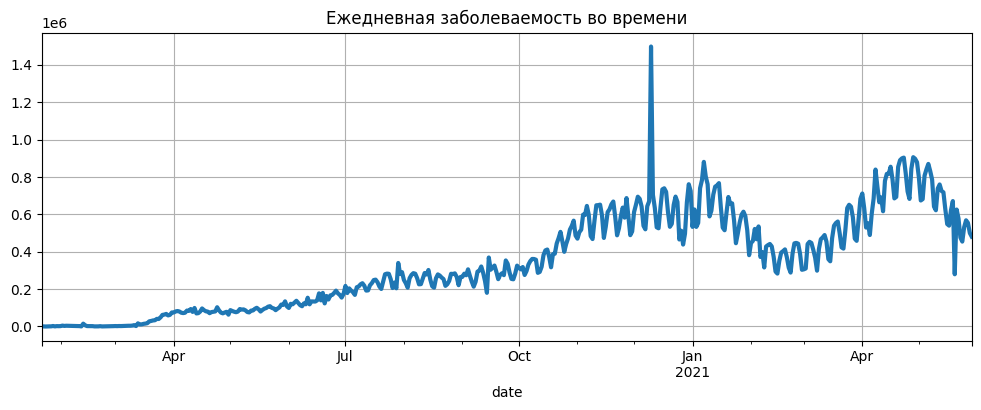

In [72]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
display (grouped_cases)
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);


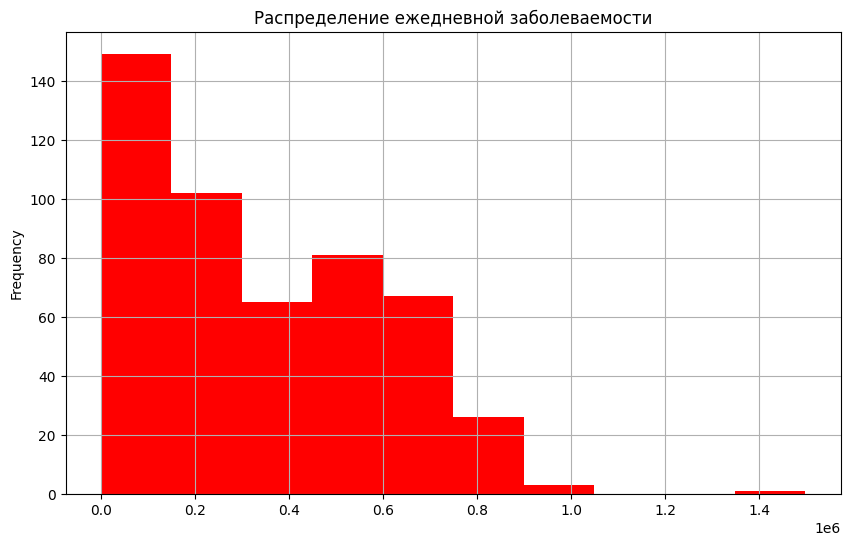

In [76]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'red',
    bins=10
);

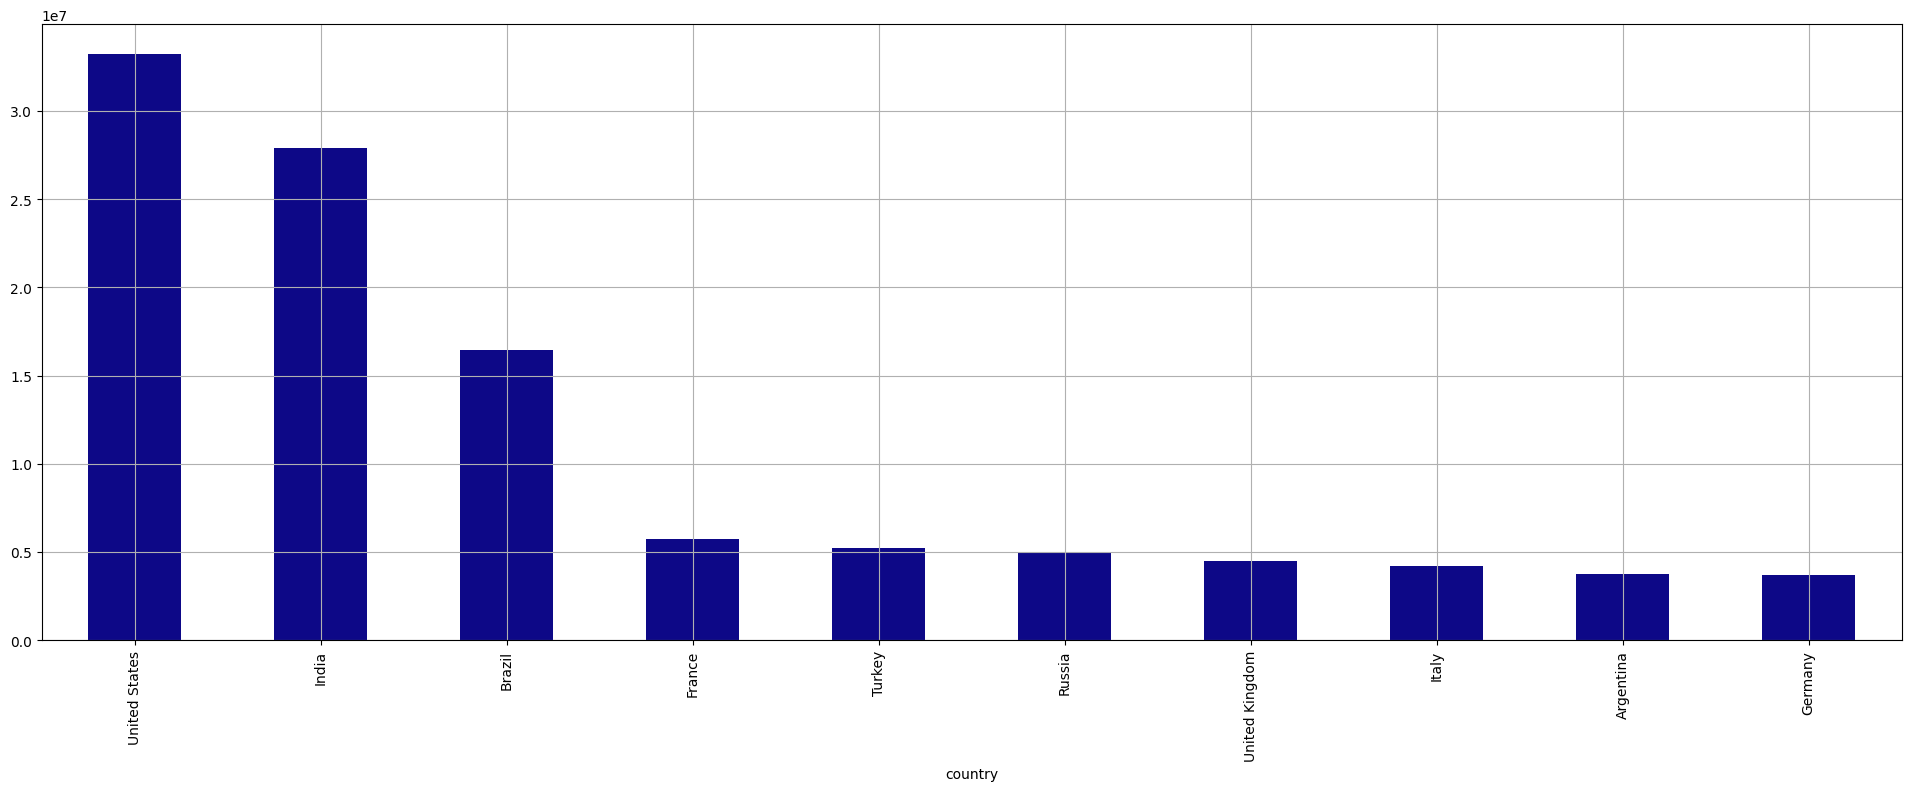

In [88]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(24, 8),
    colormap='plasma'
);

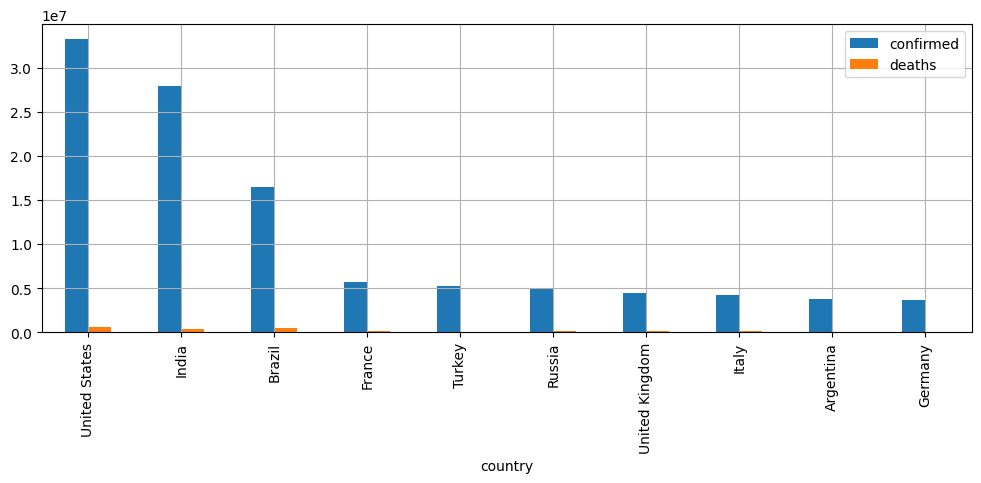

In [89]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

Задание 4.3

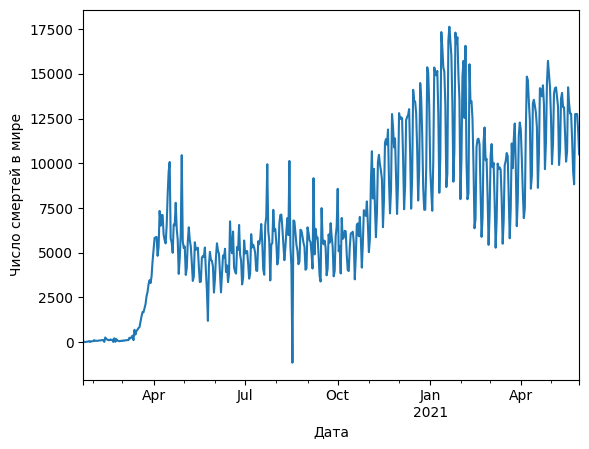

In [93]:
#covid_df.plot(x='daily_deaths', kind='line',xlabel='Дата', ylabel='Число смертей в мире');

#grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
#grouped_cases.plot(kind='line', xaxis='Дата', yaxis='Число смертей в мире');

#grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
#grouped_cases.plot(kind='bar',xlabel='Дата', ylabel='Число смертей в мире');

grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

Задание 4.4

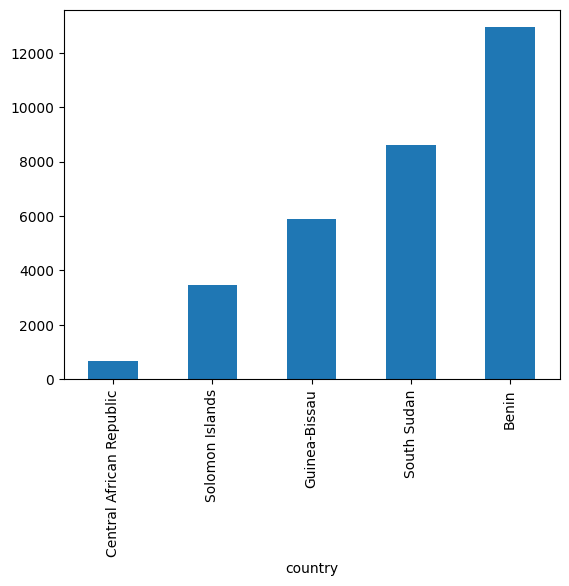

In [98]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

#covid_df.groupby(['country'])['total_vaccinations'].first().nsmallest(5).plot(kind='bar');

#covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5).plot(kind='box');

#covid_df.groupby(['date'])['total_vaccinations'].mean().nsmallest(5).plot(kind='bar');

###5. Графические возможности библиотеки Matplotlib

In [99]:
import matplotlib.pyplot as plt

In [100]:
plt.style.use('default')

In [ ]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

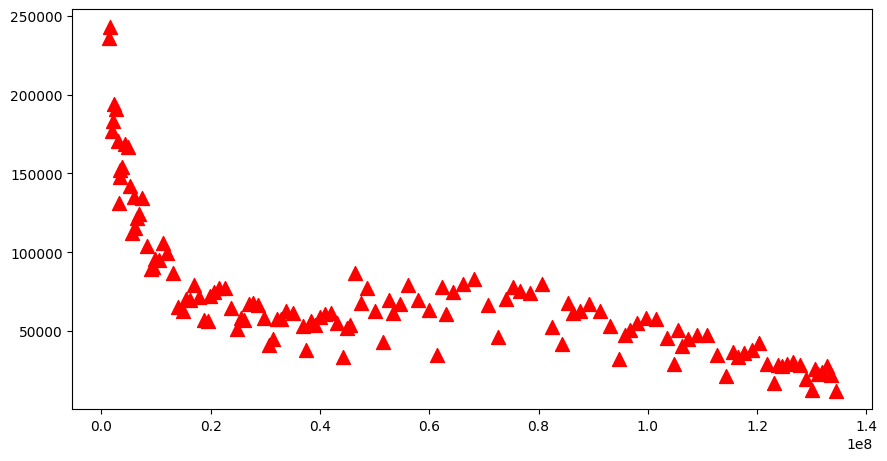

In [109]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='^',
    c = 'red'
);

In [117]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
display(vaccine_combinations)

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64

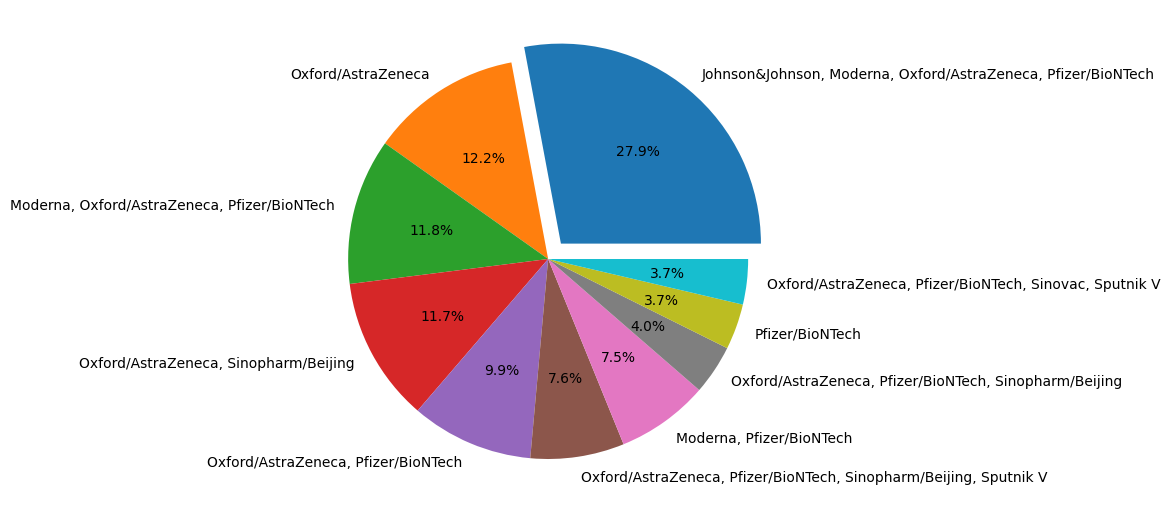

In [123]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

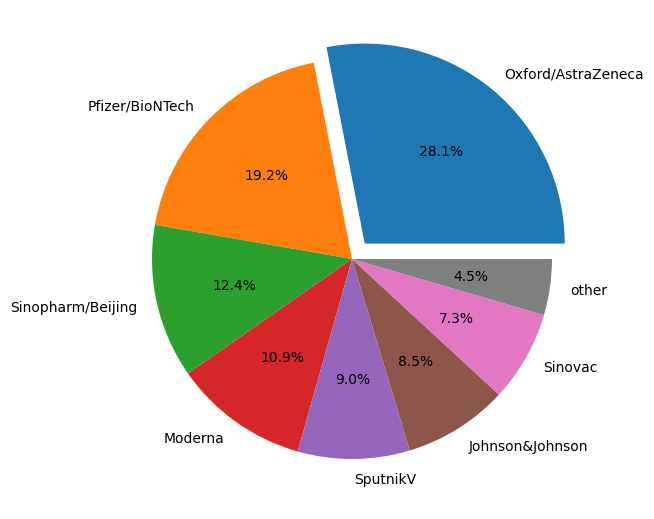

In [126]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
);

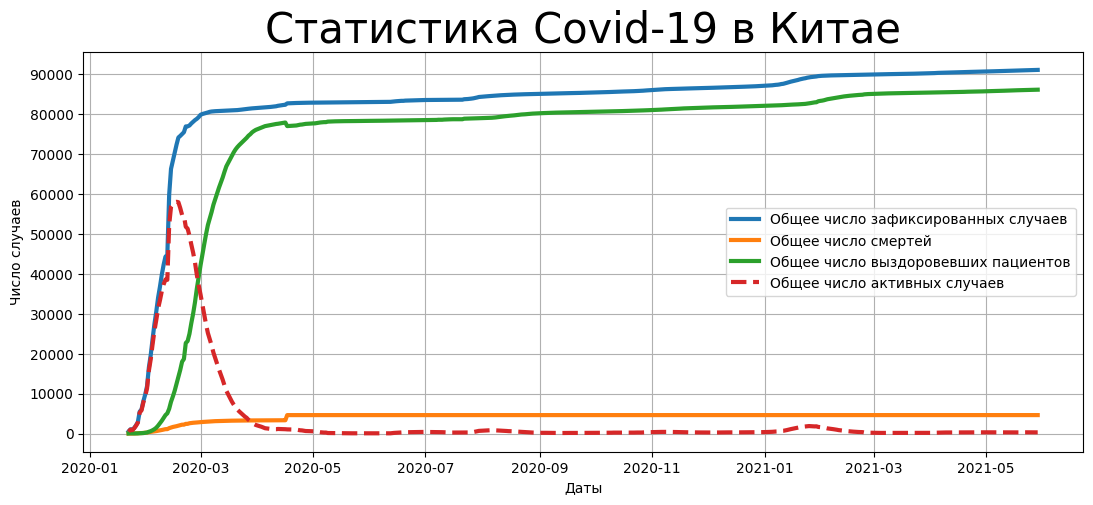

In [136]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()
#display (china_grouped)


#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=30)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=0)
axes.grid()
axes.legend();

In [139]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
#vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)
display(vacc_country)

country
United States     134418748.0
India              42930249.0
United Kingdom     25332851.0
Brazil             21977631.0
Germany            14631280.0
Name: people_fully_vaccinated, dtype: float64

In [ ]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)



#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)